## Some plots for visualising filtered and downsampled data

#### Import modules

In [1]:
import physig as ps
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

#### Loading sample data

In [2]:
test_file = "/home/maspe/filer/testMice/CC1973/HC_2018-04-24_16-56-27/100_CH10.continuous"
channel = ps.loadContinuous(test_file)

# Raw data
raw = channel["data"]

Loading continuous data from /home/maspe/filer/testMice/CC1973/HC_2018-04-24_16-56-27/100_CH10.continuous


#### Create Butterworth filter and downsampling parameters

In [3]:
# Create the filter
N      = 4
fs     = 30000
fc     = 300
[b, a] = signal.butter(N, fc/(fs/2))

# Downsampling parameters: final resolution = 1000 Hz
final_fs = 1000
ds_factor = fs // final_fs
n_samples = np.int(len(raw) / ds_factor)

#### Filtering and downsampling data

In [4]:
# Filtered data
filtered = signal.filtfilt(b=b, a=a, x=raw)

# Downsample the filtered data
downsampled = signal.resample(x=filtered, num=n_samples)
# downsampled = signal.decimate(x=filtered, q=ds_factor)
# downsampled = filtered[::ds_factor]

#### Plotting the data

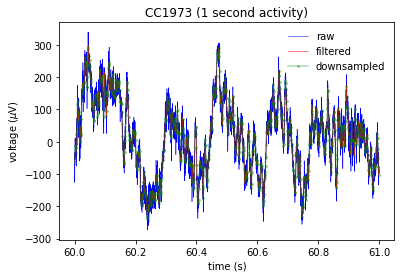

In [5]:
### Some plots ###
# Extract from second 60 to 61
fs = 30000
interval=1/fs
ds_fs = 1000
ds_interval=1/ds_fs
start = 60 * fs
end   = 61 * fs
ds_start = 60 * ds_fs
ds_end   = 61 * ds_fs
normal_axis = np.arange(60, 61, interval)#np.linspace(start, end, fs)
ds_axis     = np.arange(60, 61, ds_interval)#np.linspace(start, end, ds_fs)

fig = plt.figure()
plt.plot(normal_axis, raw[start:end], 'b-', linewidth=0.5, label='raw')
plt.plot(normal_axis, filtered[start:end], 'r-', linewidth=0.5, label='filtered')
plt.plot(ds_axis, downsampled[ds_start:ds_end], 'g-o', markersize=2, alpha=0.3, label='downsampled')

# plt.xticks(np.arange(start, end + 1, (end - start) / 2), ['60', '60.5', '61'], rotation=0)

plt.xlabel('time (s)')
plt.ylabel('voltage ($\mu$V)')
plt.title('CC1973 (1 second activity)')
plt.legend(frameon=False)

plt.show()

fig.savefig("/home/maspe/filer/testFiles/figs/downsampled_data.png", dpi=150, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=False)